# Метод опорных векторов - Support Vector Machines 

## Цели проекта

Компания-дистрибьютор вина столкнулась с подделками. В итоге был проведён аудит различных вин с помощью химического анализа. Компания занимается экспортом очень качественных и дорогих вин, но один из поставщиков попытался передать дешёвое вино под видом более дорогого. Компания-дистрибьютор хочет создать модель машинного обучения, которая предскажет низкое качество вина (то есть, "подделку"). Они хотят узнать, возможно ли определить разницу между дешёвыми и дорогими винами.

Цель - используя данные ниже, разработать модель машинного обучения, которая будет предсказывать на основе некоторых химических тестов, является ли вино настоящим или поддельным. 


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("wine_fraud.csv")

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Legit,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Legit,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red


In [4]:
df['quality'].unique()

array(['Legit', 'Fraud'], dtype=object)

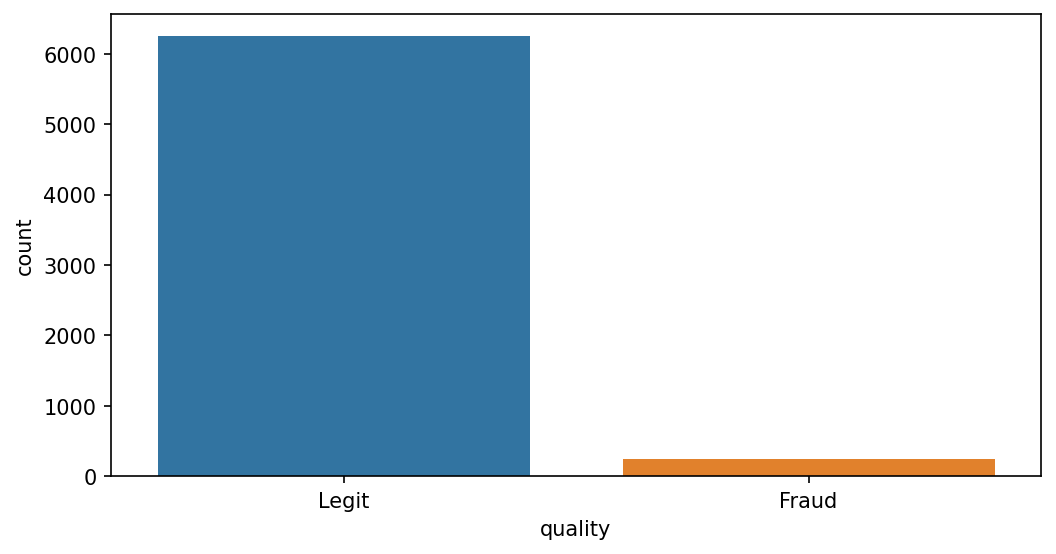

In [5]:
fig = plt.figure(figsize=(8,4), dpi =150)
sns.countplot(x = 'quality', data = df);

Количество подделок в зависимости от того, красное вино или бело:

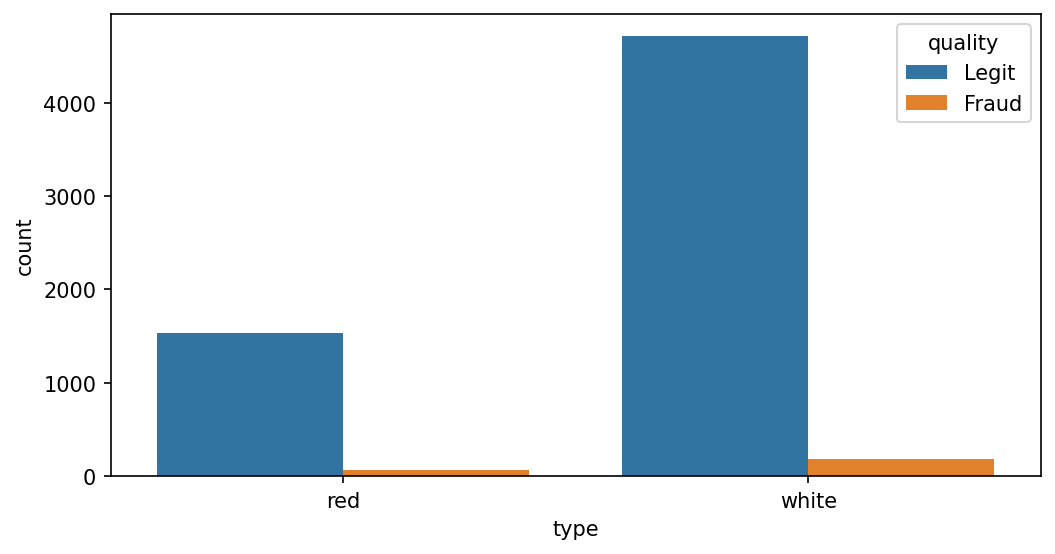

In [7]:
fig = plt.figure(figsize=(8,4), dpi =150)
sns.countplot(x = 'type', data = df, hue = 'quality');

Посмотрим, какой процент красных и белых вин является подделкой.

In [8]:
# количество красных вин
red = df[df['type'] =='red']
# количество белых вин
white = df[df['type'] =='white']

In [9]:
lr = len ( red [ red['quality'] == 'Fraud' ] )
lw = len ( white [ white['quality'] == 'Fraud' ] )

Процент подделок среди красных вин.

In [10]:
Percentage_of_fraud_in_Red_Wines = lr / len(red)
Percentage_of_fraud_in_Red_Wines

0.039399624765478425

Процент подделок среди белых вин.

In [11]:
Percentage_of_fraud_in_White_Wines = 100 * lw / len(white)
Percentage_of_fraud_in_White_Wines

3.736218864842793

Вычислим корреляцию между различными признаками и колонкой "quality".

In [12]:
df['Fraud'] = df['quality'].map({'Fraud': 1, 'Legit': 0})

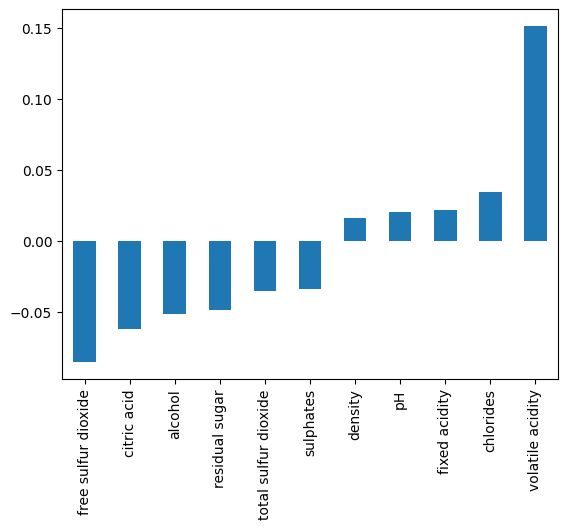

In [13]:
df.corr( numeric_only=True)['Fraud'][:-1].sort_values().plot(kind='bar');

### Модель машинного обучения

In [40]:
df = df.drop('Fraud', axis = 1)

In [41]:
df['type'] = pd.get_dummies(df['type'], drop_first=True)

Целевая переменная

In [42]:
X = df.drop('quality', axis = 1)

In [43]:
y = df['quality']

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.1, random_state=101)

Масштабирование

In [46]:
from sklearn.preprocessing import StandardScaler

In [47]:
scaler = StandardScaler()

In [57]:
sc_X_train = scaler.fit_transform(X_train)

In [58]:
sc_X_test = scaler.transform(X_test)

Модель

In [59]:
from sklearn.svm import SVC

In [60]:
svc_model = SVC (class_weight='balanced')

Поиск по сетке значений параметров C и gamma

In [53]:
from sklearn.model_selection import GridSearchCV

In [61]:
param_grid = { 'C' : [0.001, 0.01, 0.1, 0.5, 1], 'gamma'  : ['scale', 'auto'] }

In [62]:
grid_search = GridSearchCV ( estimator= svc_model,param_grid= param_grid)

In [63]:
grid_search.fit(sc_X_train, y_train)

GridSearchCV(estimator=SVC(class_weight='balanced'),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1],
                         'gamma': ['scale', 'auto']})

In [64]:
grid_search.best_params_

{'C': 1, 'gamma': 'auto'}

Сonfusion matrix и отчёт classification report

In [71]:
pred = grid_search.predict(sc_X_test)

In [74]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report

In [76]:
confusion_matrix(y_test, pred)

array([[ 17,  10],
       [ 92, 531]], dtype=int64)

In [79]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

       Fraud       0.16      0.63      0.25        27
       Legit       0.98      0.85      0.91       623

    accuracy                           0.84       650
   macro avg       0.57      0.74      0.58       650
weighted avg       0.95      0.84      0.88       650

